In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, multivariate_normal

In [ ]:
# def simple_sampling_uniform(min, max, sample_size):

#     samples = []
#     range_size = max - min
#     for i in range(sample_size):
#         x = random.random()
#         sample = min + range_size * x 
#         samples.append(sample)
#     return samples

In [ ]:
# def simple_sampling_gaussian(mu, sigma, sample_size):

#     samples = []
#     for i in range(sample_size):
#         x = random.random()
#         y = random.random()
#         z = math.sqrt(-2 * math.log(x)) * math.cos(2 * math.pi * y)
#         samples.append(mu + sigma * z)
#     return samples 

In [ ]:
# def sampling_gaussian2D(mu, sigma, sample_size):

#     sigma_x = math.sqrt(sigma[0][0])
#     sigma_y = math.sqrt(sigma[1][1])
#     # Calculate the correlation coefficient from the covariance matrix
#     cor = sigma[0][1] / (sigma_x * sigma_y)

#     samples = []
#     for i in range(sample_size):
#         # Generate two independent random variables using the Box-Muller transform
#         u1 = random.random()
#         u2 = random.random()
#         x = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
#         y = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)
#         # Transform the standard normal variables into correlated Gaussian variables
#         x_prime = sigma_x * x + mu[0]
#         y_prime = cor * sigma_y * x + math.sqrt(1 - cor ** 2) * sigma_y * y + mu[1]
#         # Add the sample to the list
#         samples.append([x_prime, y_prime])

#     return samples

In [2]:
def rejection_sampling_uniform(sample_size, min, max, M):
    pdf = uniform(loc=min, scale=max-min)
    accepted = []
    rejected = []
    i = 0
    while i < sample_size:
        x = np.random.uniform(min, max)
        y = np.random.uniform(0, 1)
        if y < pdf.pdf(x):
            accepted.append(x)
            i += 1
        else:
            rejected.append(x)
    return accepted, rejected

In [3]:
def rejection_sampling_gaussian(sample_size, mu, sigma, M):
    pdf = norm(mu, sigma)
    accepted = []
    rejected = []
    i = 0
    while i < sample_size:
        x = np.random.uniform(mu-M, mu+M)
        y = np.random.uniform(0, 1)
        if y < pdf.pdf(x):
            accepted.append(x)
            i += 1
        else:
            rejected.append(x)
    return accepted, rejected

In [4]:
def rejection_sampling_gaussian2D(sample_size, mu, sigma):
    pdf = multivariate_normal(mean=mu, cov=sigma)
    accepted = []
    rejected = []
    i = 0
    while i < sample_size:
        x = np.random.uniform(-5, 5)
        y = np.random.uniform(-5, 5)
        u = np.random.uniform(0, 1)
        if u < pdf.pdf([x,y]):
            accepted.append([x,y])
            i += 1
        else:
            rejected.append([x,y])
    return accepted, rejected   

### A. simple sampling from continuous distributions: Uniform, Gaussian

#### Uniform

In [ ]:
min = 0
max = 5
M = 1.5
sample_size = 10000

uniform_accepted, uniform_rejected = rejection_sampling_uniform(sample_size, min, max, M)

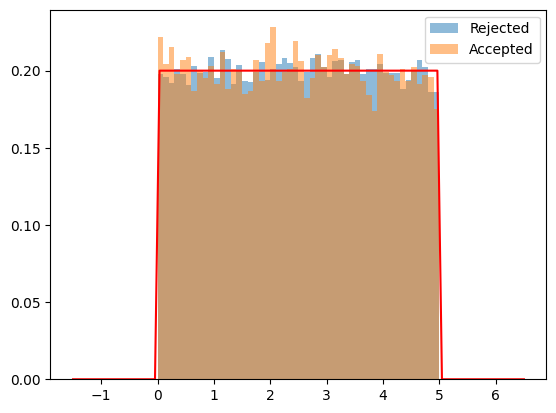

In [ ]:
plt.hist(uniform_rejected, bins=50, density=True, alpha=0.5, label='Rejected')
plt.hist(uniform_accepted, bins=50, density=True, alpha=0.5, label='Accepted')
x = np.linspace(-1.5, 6.5, 100)
plt.plot(x, uniform(loc=min, scale=max-min).pdf(x), 'r')
plt.legend()
plt.show()

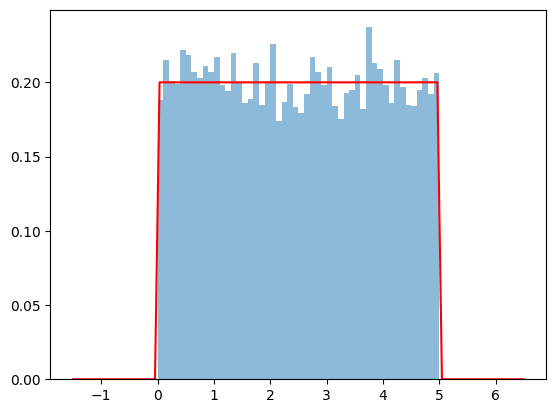

In [ ]:
plt.hist(uniform_accepted, bins=50, density=True, alpha=0.5)
x = np.linspace(-1.5, 6.5, 100)
plt.plot(x, uniform(loc=min, scale=max-min).pdf(x), 'r')
plt.show()

#### Gaussian

In [ ]:
mu = 0
sigma = 1
M = 6
sample_size = 10000

gaussian_accepted, gaussian_rejected = rejection_sampling_gaussian(sample_size, mu, sigma, M)

print('Mean:', np.mean(gaussian_accepted))
print('Standard Deviation:', np.std(gaussian_accepted))

Mean: -0.011375936060863278
Standard Deviation: 0.9990025008064721


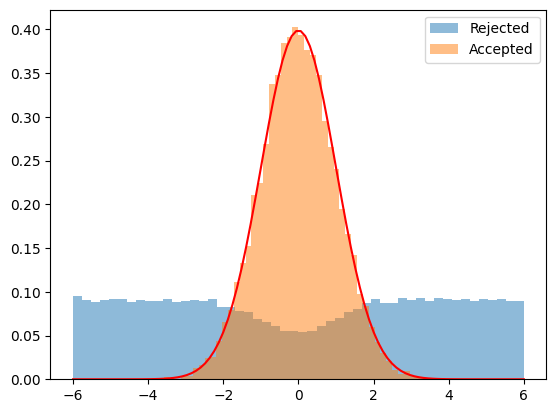

In [ ]:
plt.hist(gaussian_rejected, bins=50, density=True, alpha=0.5, label='Rejected')
plt.hist(gaussian_accepted, bins=50, density=True, alpha=0.5, label='Accepted')
x = np.linspace(-6, 6, 100)
plt.plot(x, norm(mu, sigma).pdf(x), 'r')
plt.legend()
plt.show()

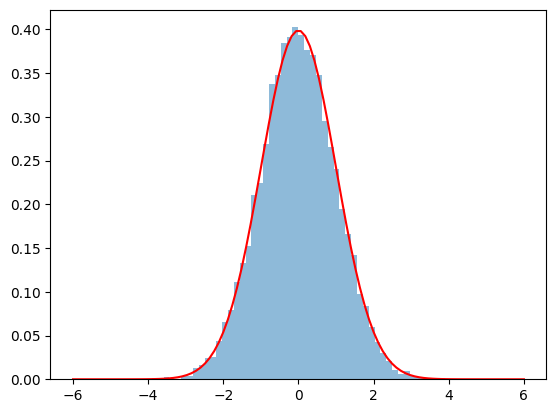

In [ ]:
plt.hist(gaussian_accepted, bins=50, density=True, alpha=0.5)
x = np.linspace(-6, 6, 100)
plt.plot(x, norm(mu, sigma).pdf(x), 'r')
plt.show()

### B. sampling from a 2-dim Gaussian Distribution

In [5]:
mu = [0, 0]
sigma = [[1, 0.5], [0.5, 2]]
sample_size = 10000

gaussian2D_accepted, gaussian2D_rejected = rejection_sampling_gaussian2D(sample_size, mu, sigma)
print('Mean:', np.mean(np.array(gaussian2D_accepted), axis=0))
print('Covariance Matrix:', np.cov(np.array(gaussian2D_accepted).T))

Mean: [-0.0011696   0.01530661]
Covariance Matrix: [[1.00621079 0.49217288]
 [0.49217288 2.01747424]]
